<a href="https://colab.research.google.com/github/deltorobarba/astrophysics/blob/main/quantum_mechanics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantum Mechanics**

Video Course: [PHY361 Quantum Mechanics:
Spin And Discrete Systems](https://youtube.com/playlist?list=PLIKpuUo6d5pLdaGlx355xdH_RCZXRuWLK&si=2U2Uixe14tr1hIMm)

#### **Expectation Value**

In [ ]:
!pip install pennylane -q

In [2]:
import pennylane as qml
import numpy as np

# Define the number of qubits and the quantum device
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# Define an observable (this is Q in your equation)
obs = qml.Hermitian(np.array([[1, 0], [0, -1]]), wires=0)

# Define a quantum state (this is |ψ⟩ in your equation)
@qml.qnode(dev)
def circuit():
    qml.RY(np.pi / 4, wires=0)  # Example state preparation (rotation)
    return qml.state()  # Returning the state vector |ψ⟩

# Retrieve the quantum state
state = circuit()

# Calculate the expectation value of the observable
@qml.qnode(dev)
def expectation_value():
    qml.RY(np.pi / 4, wires=0)  # Same state preparation as before
    return qml.expval(obs)  # Calculate the expectation value of Q

exp_val = expectation_value()

# Print the results
print(f"Quantum State: {state}")
print(f"Expectation Value of the observable: {exp_val}")

Quantum State: [0.92387953+0.j 0.        +0.j 0.38268343+0.j 0.        +0.j]
Expectation Value of the observable: 0.7071067811865475


The expectation value of $0.7071067811865475$ corresponds to the observable $Q$ in a specific quantum state. To explain why this happens, let’s break down the elements:

Observable $Q$ (Pauli-Z or Hermitian matrix)
In the example, you have an observable defined as:

$$
Q = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
$$

This matrix is the Pauli-Z operator, which has eigenvalues $+1$ and $-1$.

State $|\psi\rangle$
The quantum state is prepared using the rotation $RY(\theta)$ gate:

$$
|\psi\rangle = RY\left(\frac{\pi}{4}\right) |0\rangle
$$

The $RY(\theta)$ gate rotates the qubit state around the Y-axis of the Bloch sphere. Specifically, when $\theta = \frac{\pi}{4}$, the state $|\psi\rangle$ becomes:

$$
|\psi\rangle = \cos\left(\frac{\pi}{8}\right) |0\rangle + \sin\left(\frac{\pi}{8}\right) |1\rangle
$$

Numerically, this is:

$$
|\psi\rangle = \cos\left(22.5^\circ\right) |0\rangle + \sin\left(22.5^\circ\right) |1\rangle \approx 0.9239 |0\rangle + 0.3827 |1\rangle
$$

Expectation Value Calculation

The expectation value of an observable $Q$ in a quantum state $|\psi\rangle$ is given by:

$$
\langle Q \rangle_\psi = \langle \psi | Q | \psi \rangle
$$

Substitute $|\psi\rangle$:

$$
\langle Q \rangle_\psi = \left(0.9239^* \langle 0| + 0.3827^* \langle 1|\right) \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \left( 0.9239 |0\rangle + 0.3827 |1\rangle \right)
$$

Simplifying:

$$
\langle Q \rangle_\psi = 0.9239^2 \cdot 1 + 0.3827^2 \cdot (-1)
$$

This becomes:

$$
\langle Q \rangle_\psi = (0.9239)^2 - (0.3827)^2 = 0.8536 - 0.1464 = 0.7071
$$

The expectation value of the observable $Q$ is $0.7071$ because it depends on the overlap between the eigenstates of the Pauli-Z matrix (the computational basis states $|0\rangle$ and $|1\rangle$) and the rotated state $|\psi\rangle$. The specific angle $\pi/4$ for the rotation gate produces a superposition state that results in this non-trivial expectation value.

In [3]:
!pip install qutip -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 21.5 MB/s eta 0:00:00


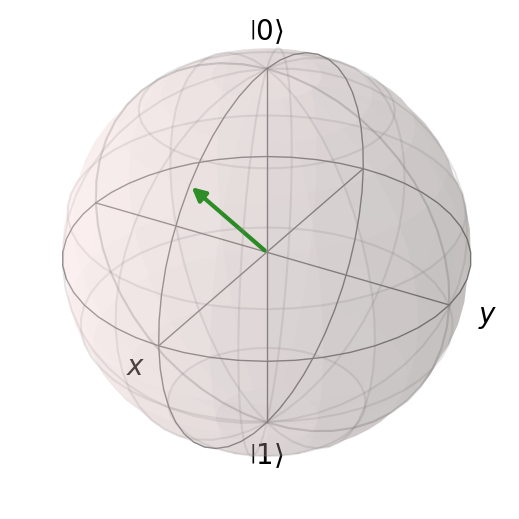

In [4]:
import pennylane as qml
import numpy as np
from qutip import Bloch

# Define the quantum device with one qubit
dev = qml.device("default.qubit", wires=1)

# Define the quantum circuit
@qml.qnode(dev)
def circuit():
    qml.RY(np.pi / 4, wires=0)  # Apply a rotation gate to prepare a state
    return qml.state()

# Get the quantum state (|ψ⟩)
state = circuit()

# Calculate Bloch sphere coordinates
def bloch_coords(state):
    # Expectation values of Pauli-X, Pauli-Y, Pauli-Z
    x = 2 * np.real(state[0] * np.conj(state[1]))
    y = 2 * np.imag(state[0] * np.conj(state[1]))
    z = np.abs(state[0])**2 - np.abs(state[1])**2
    return [x, y, z]

# Get the Bloch sphere coordinates from the state
coords = bloch_coords(state)

# Create a Bloch sphere and add the state vector
b = Bloch()
b.add_vectors(coords)
b.show()